# My Libraries

In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "D:\My_Jupyter_Project\Chat_bot\langchain_env\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\My_Jupyter_Project\Chat_bot\langchain_env\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "D:\My_Jupyter_Project\Chat_bot\langchain_env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in l

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "D:\My_Jupyter_Project\Chat_bot\langchain_env\Lib\runpy.py", line 198, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "D:\My_Jupyter_Project\Chat_bot\langchain_env\Lib\runpy.py", line 88, in _run_code
    exec(code, run_globals)
  File "D:\My_Jupyter_Project\Chat_bot\langchain_env\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in l

AttributeError: _ARRAY_API not found

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [3]:
'/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv'

'/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv'

In [5]:
df=pd.read_csv('D:/Data set/Bank Customer/Customer-Churn-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


# Exploratory Data Analysis

In [5]:
df1 = df.loc[:,['Geography','Exited']]

In [11]:
encoded_values = np.zeros(len(df1))
encoded_values

array([0., 0., 0., ..., 0., 0., 0.])

In [12]:
df1['Exited'].mean()

0.2038

In [9]:
category_means = df1.groupby('Geography')['Exited'].mean()
category_means

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64

In [14]:

from sklearn.model_selection import KFold

# Out-of-Fold Mean Target Encoding for Regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)
encoded_values = np.zeros(len(df1))

for train_idx, val_idx in kf.split(df1):
    train_data, val_data = df1.iloc[train_idx], df1.iloc[val_idx]
    category_means = train_data.groupby('Geography')['Exited'].mean()
    encoded_values[val_idx] = val_data['Geography'].map(category_means).fillna(df1['Exited'].mean())

df1['Category_Encoded'] = encoded_values

print(df1.sample(11))


     Geography  Exited  Category_Encoded
2497    France       0          0.163353
4354     Spain       0          0.172431
5415    France       0          0.161772
4519     Spain       0          0.172431
7388    France       0          0.162744
4674   Germany       0          0.326591
4745   Germany       1          0.318294
2240   Germany       0          0.318294
9170    France       0          0.162744
6756    France       1          0.162744
5295   Germany       0          0.323895


In [4]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


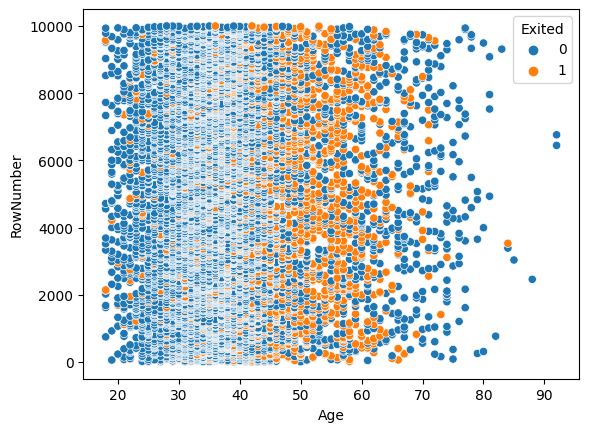

In [41]:
sns.scatterplot(x='Age',y='RowNumber',hue='Exited', data=df)
plt.show()

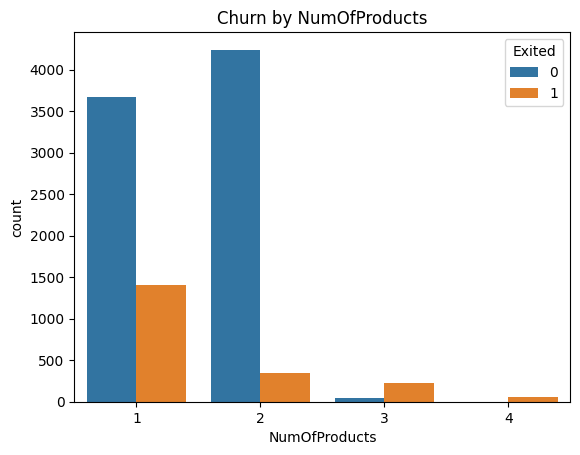

In [43]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by NumOfProducts')
plt.show()

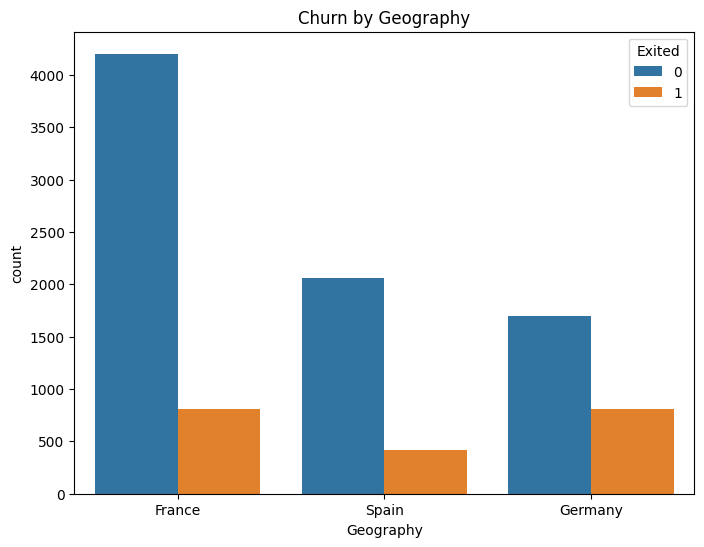

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

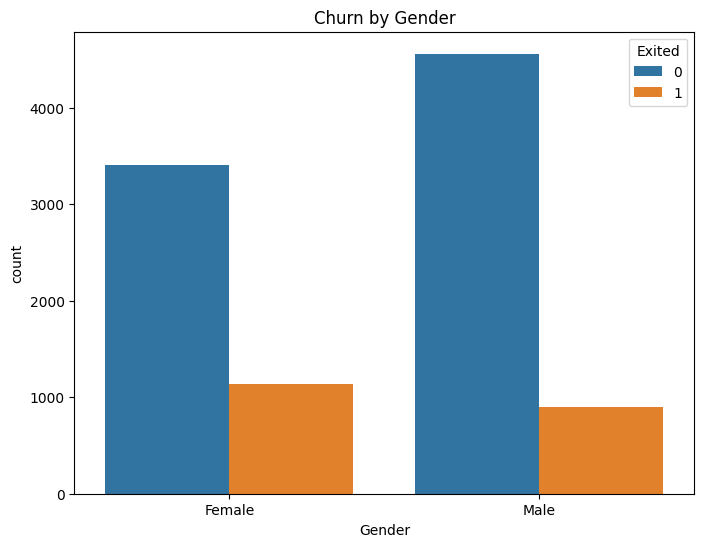

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

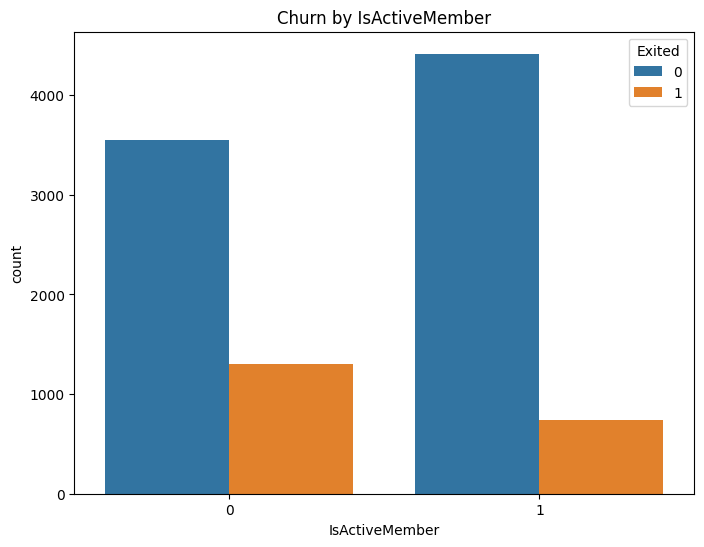

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by IsActiveMember')
plt.show()

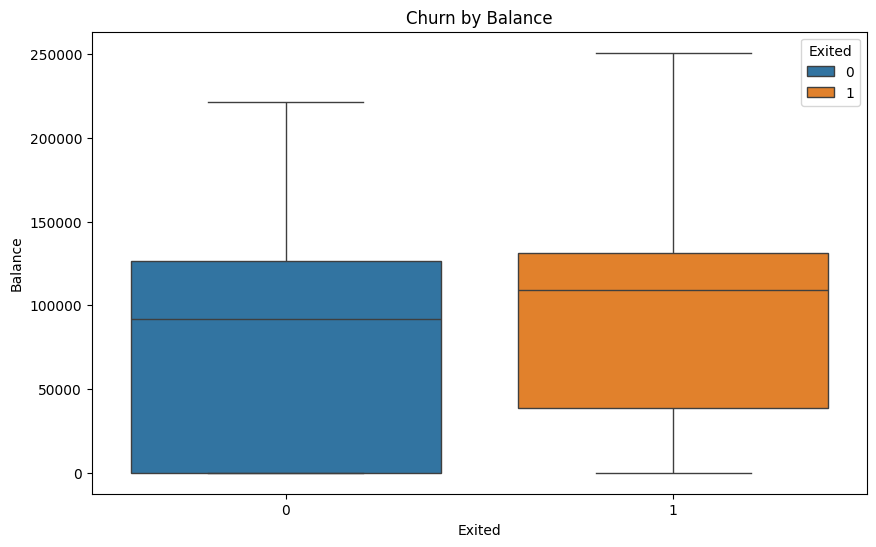

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Balance',hue='Exited', data=df)
plt.title('Churn by Balance')
plt.show()

In [5]:
variables = df.select_dtypes(include=['number'])

# Creating a DataFrame to store the VIF value for each feature
vif = pd.DataFrame()

# Computing the VIF for each selected feature using list comprehension
# Storing the values in a column called 'VIF'
vif['VIF'] = [variance_inflation_factor(variables.to_numpy(), i) for i in range(variables.shape[1])]

# Storing the names of the features in a column called 'features'
vif['features'] = variables.columns

# Displaying the DataFrame
vif

,VIF,features
0,4.003533,RowNumber
1,95.862078,CustomerId
2,46.355260,CreditScore
3,16.407126,Age
4,4.011855,Tenure
5,2.794489,Balance
6,8.747302,NumOfProducts
7,3.398826,HasCrCard
8,2.159049,IsActiveMember
9,4.034853,EstimatedSalary


In [6]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname','Complain','CreditScore'], axis=1, inplace=True)

<Axes: >

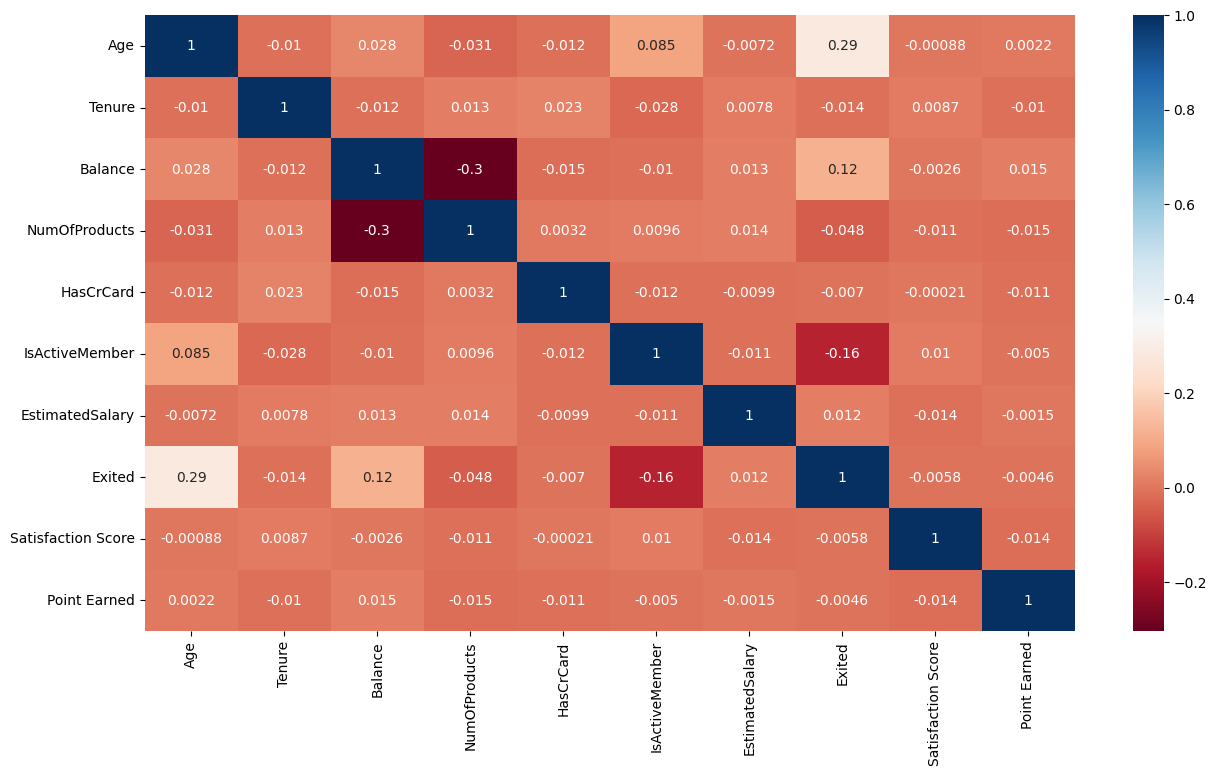

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.select_dtypes(include=['number']).corr(),annot=True,cmap='RdBu')

In [8]:
df.drop(columns=['EstimatedSalary', 'Tenure', 'HasCrCard','Satisfaction Score','Point Earned'], axis=1, inplace=True)

In [9]:
catig_columns=df[['Geography','Gender','Card Type']]
catig_columns

,Geography,Gender,Card Type
0,France,Female,DIAMOND
1,Spain,Female,DIAMOND
2,France,Female,DIAMOND
3,France,Female,GOLD
4,Spain,Female,GOLD
...,...,...,...
9995,France,Male,DIAMOND
9996,France,Male,PLATINUM
9997,France,Female,SILVER
9998,Germany,Male,GOLD


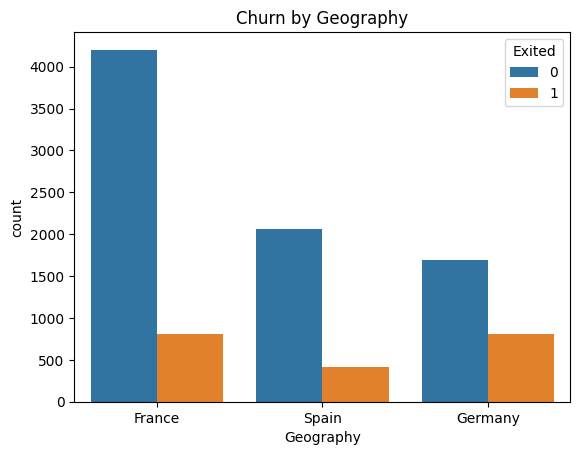

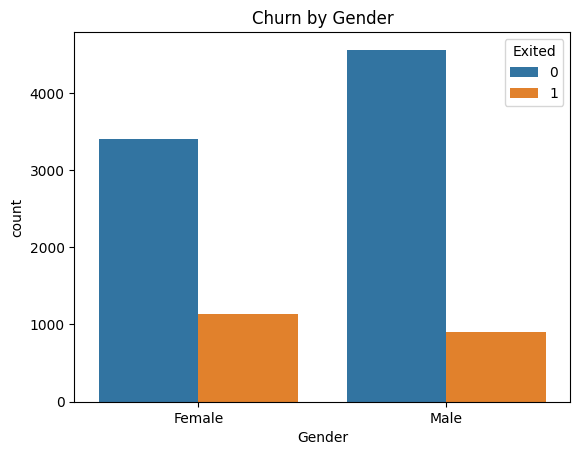

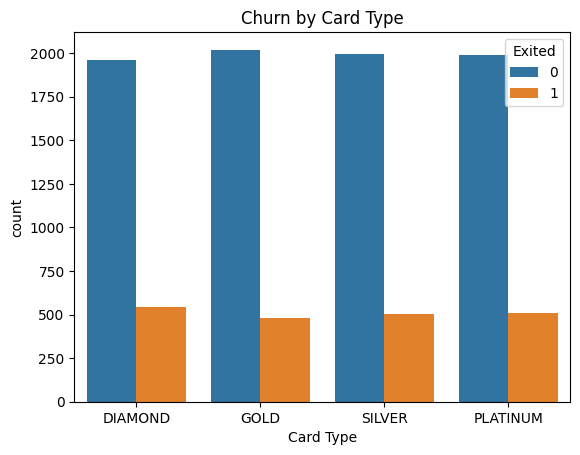

In [37]:
for i in catig_columns:
    sns.countplot(x=i, hue='Exited', data=df)
    plt.title(f'Churn by {i}')
    plt.show()

In [10]:
df.drop('Card Type',axis=1,inplace=True)

In [11]:
X = df.drop(columns=['Exited'], axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scale=MinMaxScaler()
OHE=OneHotEncoder(drop='first', sparse_output=False)
X_train[['Age','Balance']]=scale.fit_transform(X_train[['Age','Balance']])
X_test[['Age','Balance']]=scale.transform(X_test[['Age','Balance']])

encoded_train = OHE.fit_transform(X_train[['Geography', 'Gender']])
encoded_test = OHE.transform(X_test[['Geography', 'Gender']])

# Create DataFrame for the encoded features
encoded_train_df = pd.DataFrame(
    encoded_train, 
    columns=OHE.get_feature_names_out(['Geography', 'Gender']),
    index=X_train.index
)

encoded_test_df = pd.DataFrame(
    encoded_test,
    columns=OHE.get_feature_names_out(['Geography', 'Gender']),
    index=X_test.index
)

# Drop original categorical columns and concatenate encoded features
X_train = pd.concat([X_train.drop(['Geography', 'Gender'], axis=1), encoded_train_df], axis=1)
X_test = pd.concat([X_test.drop(['Geography', 'Gender'], axis=1), encoded_test_df], axis=1)

# Verify the output
print(X_train.head())


           Age   Balance  NumOfProducts  IsActiveMember  Geography_Germany  \
9254  0.189189  0.000000              2               1                0.0   
1561  0.324324  0.476786              2               1                1.0   
1670  0.081081  0.457317              1               0                0.0   
6087  0.121622  0.540606              1               0                0.0   
6669  0.513514  0.566554              1               0                0.0   

      Geography_Spain  Gender_Male  
9254              0.0          1.0  
1561              0.0          1.0  
1670              1.0          1.0  
6087              0.0          0.0  
6669              0.0          1.0  


In [27]:
y_test.value_counts()

Exited
0    1607
1     393
Name: count, dtype: int64

In [13]:
vals_count = 1 - (np.bincount(y_train) / len(y_train))
vals_count = vals_count / np.sum(vals_count)  ## normalizing


dict_weights = {}
for i in range(2):  ## 2 classes (0, 1)
    dict_weights[i] = vals_count[i]

over = SMOTE(sampling_strategy=0.7)
X_train_resmapled, y_train_resampled = over.fit_resample(X_train, y_train)

In [76]:
y_train_resampled

0        0
1        0
2        1
3        1
4        1
        ..
10798    1
10799    1
10800    1
10801    1
10802    1
Name: Exited, Length: 10803, dtype: int64

In [73]:
dict_weights

{0: 0.20562499999999995, 1: 0.794375}

# Building A Model

In [14]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
y_pred_log = model_log.predict(X_test)
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_pred_log, y_test))

[[1544   63]
 [ 317   76]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1861
           1       0.19      0.55      0.29       139

    accuracy                           0.81      2000
   macro avg       0.58      0.69      0.59      2000
weighted avg       0.91      0.81      0.85      2000



In [15]:
model_log = LogisticRegression(class_weight=dict_weights)
model_log.fit(X_train,y_train)
y_pred_log = model_log.predict(X_test)
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_pred_log, y_test))

[[1161  446]
 [ 113  280]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.81      1274
           1       0.71      0.39      0.50       726

    accuracy                           0.72      2000
   macro avg       0.72      0.65      0.65      2000
weighted avg       0.72      0.72      0.70      2000



In [16]:
model_log = LogisticRegression()
model_log.fit(X_train_resmapled, y_train_resampled)
y_pred_log = model_log.predict(X_test)
print(confusion_matrix(y_test,y_pred_log))
print(classification_report(y_pred_log, y_test))

[[1323  284]
 [ 159  234]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1482
           1       0.60      0.45      0.51       518

    accuracy                           0.78      2000
   macro avg       0.71      0.67      0.69      2000
weighted avg       0.76      0.78      0.77      2000



In [19]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[1508   99]
 [ 196  197]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.67      0.50      0.57       393

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [25]:
model_dt = DecisionTreeClassifier(ccp_alpha= 0.001,random_state=42,class_weight=dict_weights)
model_dt.fit(X_train,y_train)
y_pred_dt = model_dt.predict(X_test)

print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test, y_pred_dt))

[[1234  373]
 [  94  299]]
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
           1       0.44      0.76      0.56       393

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.70      2000
weighted avg       0.83      0.77      0.79      2000



In [32]:
X_train.columns

Index(['Age', 'Balance', 'NumOfProducts', 'IsActiveMember',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male'],
      dtype='object')

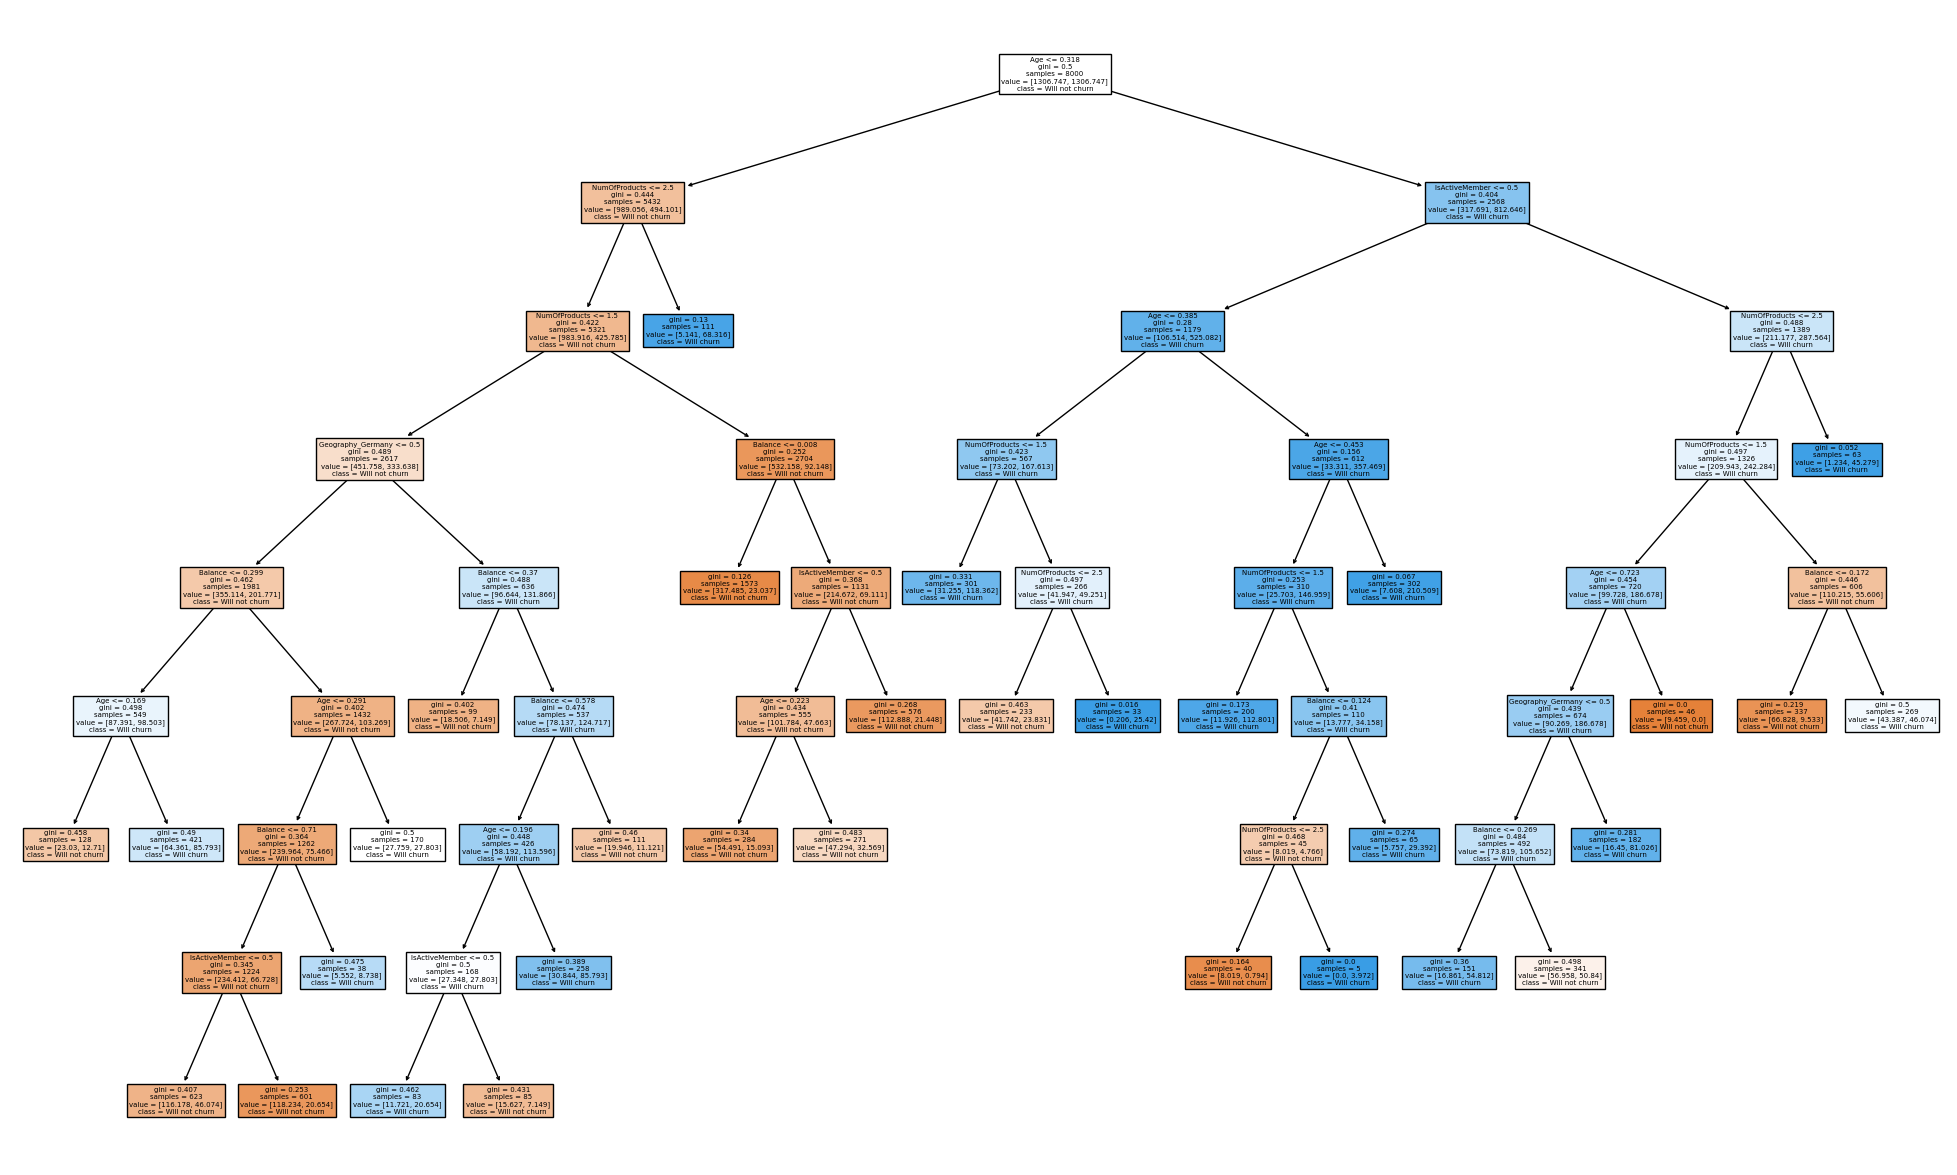

In [34]:
plt.figure(figsize=(25,15))

# Plot the decision tree. Feature names and class names are added for better interpretability
plot_tree(model_dt, 
          filled=True, 
          feature_names = ['Age', 'Balance', 'NumOfProducts', 'IsActiveMember',
                           'Geography_Germany', 'Geography_Spain', 'Gender_Male'], 
          class_names = ['Will not churn', 
                         'Will churn'])

# Display the plot
plt.show()

In [31]:
model_rf = RandomForestClassifier(ccp_alpha= 0.001,random_state=42,class_weight=dict_weights)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[1327  280]
 [  94  299]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1607
           1       0.52      0.76      0.62       393

    accuracy                           0.81      2000
   macro avg       0.73      0.79      0.75      2000
weighted avg       0.85      0.81      0.83      2000



In [38]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42,class_weight=dict_weights)                  

model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[1529   78]
 [ 193  200]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.72      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



D:\Anaconda_3\Lib\site-packages\xgboost\core.py:160: UserWarning:

[22:04:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.




In [39]:
log_reg = sm.Logit(y_train, X_train)

# Fitting the model to the training data
log_reg_results = log_reg.fit()

# Displaying a summary of the model results
log_reg_results.summary()

Optimization terminated successfully.
         Current function value: 0.456861
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7993
Method:                           MLE   Df Model:                            6
Date:                Sun, 24 Nov 2024   Pseudo R-squ.:                  0.1008
Time:                        22:08:03   Log-Likelihood:                -3654.9
converged:                       True   LL-Null:                       -4064.8
Covariance Type:            nonrobust   LLR p-value:                7.867e-174
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Age                   3.3921      0.181     18.708      0.000       3.037       3.747
Balance              -0.6834      0.123     -5.542      0.000      -0.925      -0.442
NumOfProducts        -0.8871      0.038    -23.163      0.000      -0.962      -0.812
IsActiveMember       -1.1675      0.061    -19.110      0.000      -1.287      -1.048
Geography_Germany     0.7662      0.074     10.303      0.000       0.620       0.912
Geography_Spain      -0.1862      0.075     -2.494      0.013      -0.333      -0.040
Gender_Male          -0.7911      0.057    -13.853      0.000      -0.903      -0.679
=====================================================================================
"""

# Conclusions
## Target older customers with retention strategies:
   ###  Focus on offering better services to older age groups, who are more likely to churn.
## Encourage customer engagement:
### Promote multiple product subscriptions and active membership to retain customers.
## Focus on Germany:
### Identify and address reasons for higher churn rates in Germany compared to other regions.